### Build a neural networks model based on Keras for real world regression task

You are provided with a classic Auto MPG Dataset and you are asked to build a model to predict the fuel efficiency (mpg: miles per gallon) of late-1970s and early 1980s automobiles. 

Attibute information of this dataset: 
1. mpg: continuous (your target variable)
2. cylinders: multi-valued discrete
3. displacement: continuous
4. horsepower: continuous
5. weight: continuous
6. acceleration: continuous
7. model year: multi-valued discrete
8. origin: multi-valued discrete

Full dataset information is available here: http://archive.ics.uci.edu/ml/datasets/Auto+MPG

### Load the dataset

In [1]:
import pandas as pd

dataset = pd.read_csv("auto_mpg.csv")
print("dataset length:", len(dataset))
dataset.tail()

dataset length: 398


,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


### Clean the dataset

In [2]:
# check if these is any missing value in the dataset
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [3]:
# dealing with missing values
dataset = dataset.dropna()
print("dataset length:", len(dataset))

dataset length: 392


In [4]:
# transform categorical(nominal) variable into dummy variables: 
dataset['Origin'] = dataset['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})
dataset = pd.get_dummies(dataset, columns=['Origin'], prefix='', prefix_sep='')
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
393,27.0,4,140.0,86.0,2790.0,15.6,82,0,0,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,1,0,0
395,32.0,4,135.0,84.0,2295.0,11.6,82,0,0,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,0,0,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,0,0,1


## Now it is your turn to practice what we have learned before
Follow the given instructions and fill the cell below with your own code

### Split the data into train and test
Randomly sample the dataset, use 80% for training and 20% for testing

In [5]:
from sklearn.model_selection import train_test_split

array = dataset.values
X = array[:,1:10]
y = array[:,0]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

### Normalize the variables that use different scales and ranges (optional)
One reason this is important is because the variables are multiplied by the model weights. So the scale of the outputs and the scale of the gradients are affected by the scale of the inputs.

Although a model might converge without normalization, normalization makes training much more stable.

In [6]:
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler().fit(X_train)

# transform training data
X_train_norm = norm.transform(X_train)

# transform testing data
X_test_norm = norm.transform(X_test)

### Build your own neural networks model
Hints for coding steps: setting random seed (optional), build a sequential model (can first try build with two hidden dense layers with 64 neurons each), complie the model with proper loss function and optimizer, fit the model with the normalized training data (you can try with 200 epochs first, 10% for validation and output history to help investigating the process for further improvement)

In [7]:
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense

tf.set_random_seed(1)
np.random.seed(1)

# create model
model = Sequential()
model.add(Dense(64, input_dim=9, activation='relu')) #Note that you can add more hidden layers here
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

# Compile model
model.compile(loss='mean_absolute_error', optimizer='adam') #Change the optimizer to sgd and see what happens
# Fit the model
history = model.fit(X_train_norm, y_train, epochs=200, validation_split=0.1, verbose=0) # use 10% of training dataset for validation

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Using TensorFlow backend.


### Plot the loss 
Since we did not use other performance evaluation metrics, we have loss results in the history. You can check this link if you want to add other evaluation metrics in the *model.complie()*: https://keras.io/api/metrics/

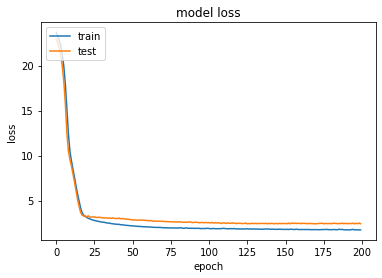

In [8]:
import matplotlib.pyplot as plt

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Evaluate model with testing data
Hint: feed with normalised testing data

In [9]:
# evaluate the model
score = model.evaluate(X_test_norm, y_test, verbose=1)
print("loss:", score)

79/79 [==============================] - 0s 38us/step
loss: 1.7668484615374216


### Makes predictions with testing data
Hint: use model.predict() to get test predictions

In [10]:
test_predictions = model.predict(X_test_norm)

# summarize the first 5 cases
for i in range(5):
    print('%s => %d (expected %d)' % (X_test[i].tolist(), test_predictions[i], y_test[i]))

[4.0, 97.0, 88.0, 2130.0, 14.5, 70.0, 0.0, 1.0, 0.0] => 25 (expected 27)
[4.0, 112.0, 88.0, 2640.0, 18.6, 82.0, 0.0, 0.0, 1.0] => 30 (expected 27)
[6.0, 250.0, 105.0, 3459.0, 16.0, 75.0, 0.0, 0.0, 1.0] => 18 (expected 18)
[6.0, 163.0, 125.0, 3140.0, 13.6, 78.0, 1.0, 0.0, 0.0] => 20 (expected 17)
[4.0, 121.0, 98.0, 2945.0, 14.5, 75.0, 1.0, 0.0, 0.0] => 21 (expected 22)


If you are interested in measuring the model with r squared (a statistic that only applies to regression mpdels to measure model fit), you can try the following code. The best possible r squared score is 1.0, so the model is considered better fitted to the data if the score is close to 1.

In [11]:
from sklearn.metrics import r2_score

r_squared = r2_score(y_test, test_predictions.flatten())
print("r_squared: ", r_squared)

r_squared:  0.8741739571411622


You can try change the neural networks structure, and see if the model performance can be improved.